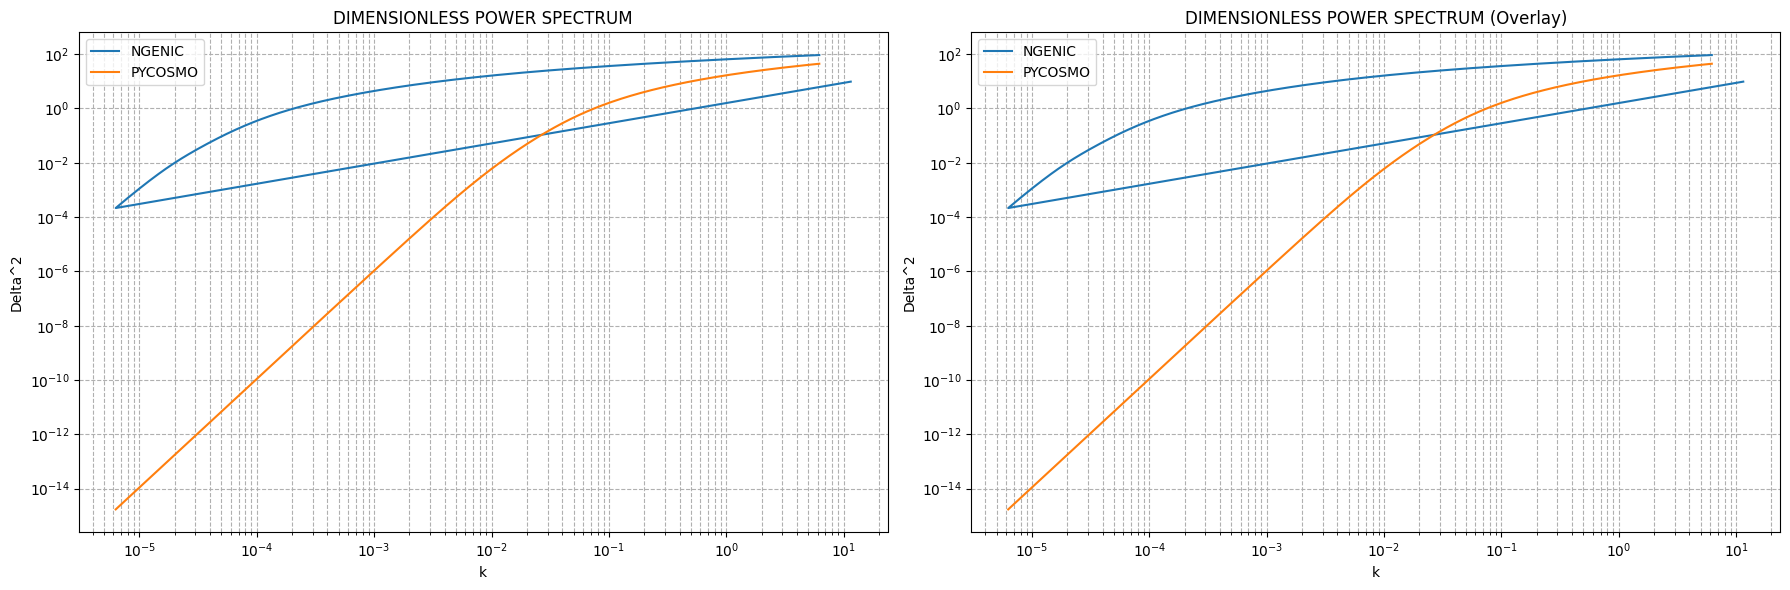

In [22]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Load data from the file
data = np.loadtxt('32_input_spectrum.txt')

# Load the first two columns from 'inputspec_lsf_512.txt'
inputspec_data = np.loadtxt('inputspec_lsf_small_box_32.txt', usecols=(0, 1))

# If the file has two columns: frequency and amplitude
if data.ndim == 2 and data.shape[1] == 2:
    log_pycosmo_wave_numbers = data[:, 0]
    log_pycosmo_delta_squared = data[:, 1]
else:
    # If the file has only one column (amplitude), use index as x
    log_pycosmo_wave_numbers= np.arange(len(data))
    log_pycosmo_delta_squared = data

# Separate columns
ngenic_wave_numbers = inputspec_data[:, 0]
ngenic_delta_squared = inputspec_data[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot both spectra on the same graph with different colors
axes[0].plot(ngenic_wave_numbers, ngenic_delta_squared, label='NGENIC', color='tab:blue')
axes[0].plot(10**log_pycosmo_wave_numbers, 10**log_pycosmo_delta_squared, label='PYCOSMO', color='tab:orange')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Delta^2')
axes[0].set_title('DIMENSIONLESS POWER SPECTRUM')
axes[0].grid(True, which='both', ls='--')
axes[0].legend()

''# Keep the second subplot for individual comparison if needed
axes[1].plot(ngenic_wave_numbers, ngenic_delta_squared, label='NGENIC', color='tab:blue')
axes[1].plot(10**log_pycosmo_wave_numbers, 10**log_pycosmo_delta_squared, label='PYCOSMO', color='tab:orange')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Delta^2')
axes[1].set_title('DIMENSIONLESS POWER SPECTRUM (Overlay)')
axes[1].grid(True, which='both', ls='--')
axes[1].legend()

plt.tight_layout()
plt.show()

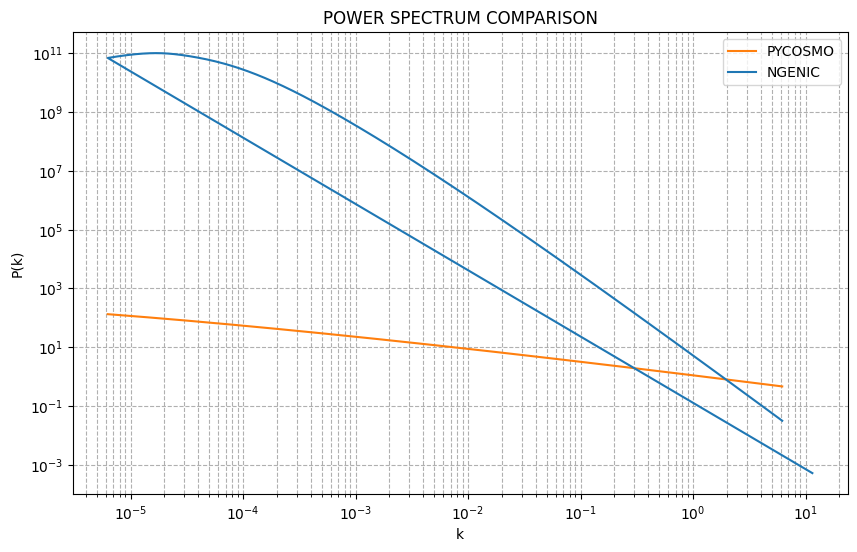

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(10**log_pycosmo_wave_numbers, 10**log_pycosmo_power_spectrum, label='PYCOSMO', color='tab:orange')
plt.plot(ngenic_wave_numbers, ngenic_power_spec, label='NGENIC', color='tab:blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('POWER SPECTRUM COMPARISON')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()


In [24]:
import pandas as pd

# Print the first two columns of 'inputspec_lsf_512.txt'
# Load the first two columns from 'inputspec_lsf_512.txt'
# Use x and y arrays, output in scientific notation

df = pd.DataFrame({'log10(k)': np.log10(ngenic_wave_numbers), 'log10(delta^2)': np.log10(ngenic_delta_squared)})

# Set pandas display option for scientific notation
pd.set_option('display.float_format', '{:.6e}'.format)

print(df)
df.to_csv('test_spectrum.txt', sep='\t', index=False, header=True, float_format='%.6e')


         log10(k)  log10(delta^2)
0    1.060698e+00    9.885313e-01
1   -5.201820e+00   -3.665416e+00
2   -5.191097e+00   -3.626332e+00
3   -5.180373e+00   -3.587350e+00
4   -5.169649e+00   -3.548471e+00
..            ...             ...
556  7.499248e-01    1.959867e+00
557  7.606494e-01    1.961816e+00
558  7.713729e-01    1.963760e+00
559  7.820969e-01    1.965701e+00
560  7.928209e-01    1.967637e+00

[561 rows x 2 columns]
